In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [5]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

In [7]:
print(df.describe())

       release_year  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
count   8809.000000          0.0          0.0          0.0          0.0   
mean    2014.181292          NaN          NaN          NaN          NaN   
std        8.818932          NaN          NaN          NaN          NaN   
min     1925.000000          NaN          NaN          NaN          NaN   
25%     2013.000000          NaN          NaN          NaN          NaN   
50%     2017.000000          NaN          NaN          NaN          NaN   
75%     2019.000000          NaN          NaN          NaN          NaN   
max     2024.000000          NaN          NaN          NaN          NaN   

       Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
count          0.0          0.0          0.0          0.0          0.0   
mean           NaN          NaN          NaN          NaN          NaN   
std            NaN          NaN          NaN          NaN          NaN   
min            NaN          

In [8]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


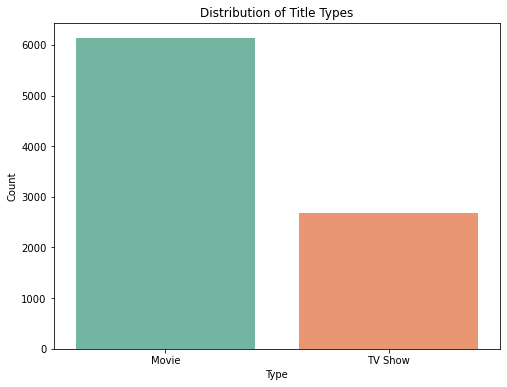

In [13]:
# Distribution of title types (Movie vs TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Title Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

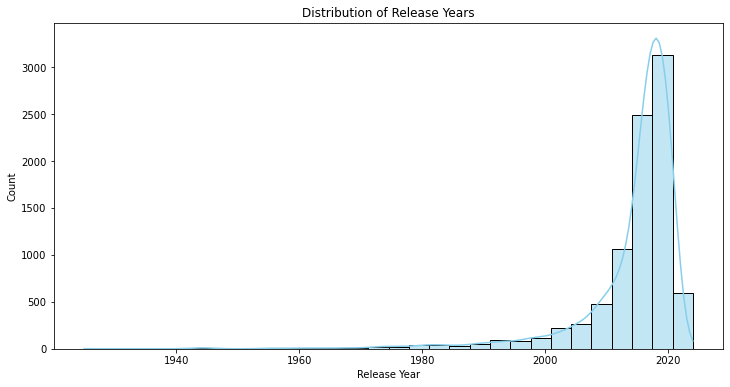

In [14]:
# Distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', data=df, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


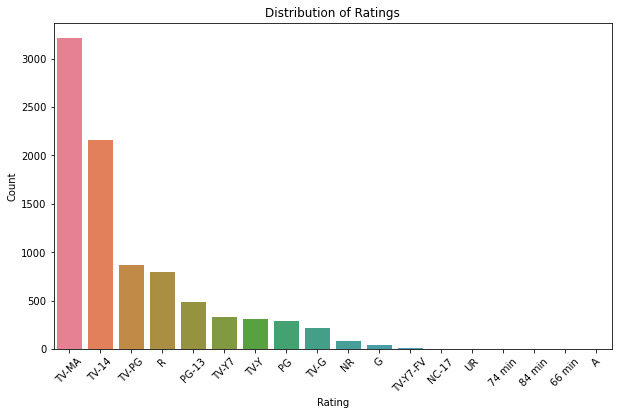

In [15]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='husl', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

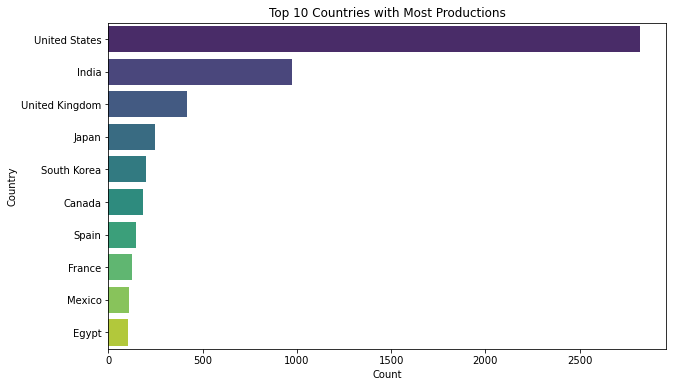

In [16]:
# Top 10 countries with most productions
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Productions')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

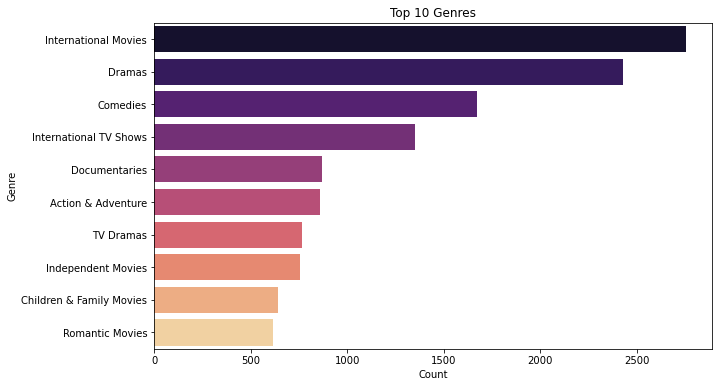

In [17]:
# Genre Analysis
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

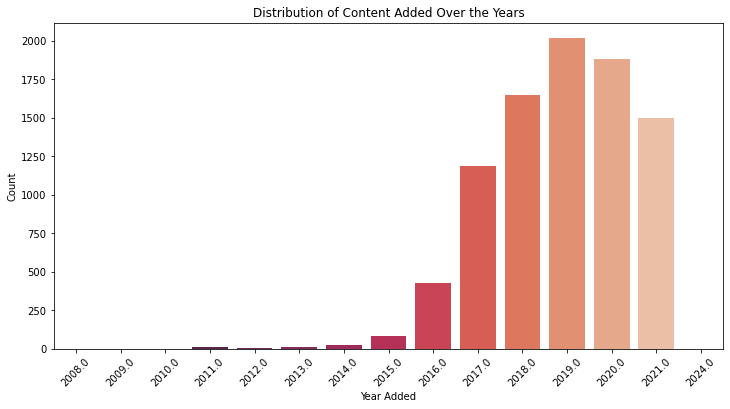

In [18]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])


# Extract month and year from date_added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year


# Distribution of content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='rocket')
plt.title('Distribution of Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


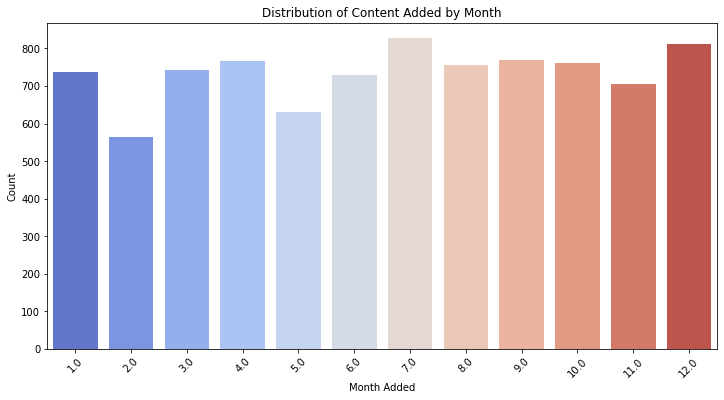

In [19]:
# Distribution of content added by month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', data=df, palette='coolwarm')
plt.title('Distribution of Content Added by Month')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Duration Analysis
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = df['duration'].str.replace(' Season', '')

In [26]:
# Convert duration for movies to float
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].astype(float)


In [27]:
# Convert duration for TV shows to integer
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].str.extract('(\d+)').astype(float)

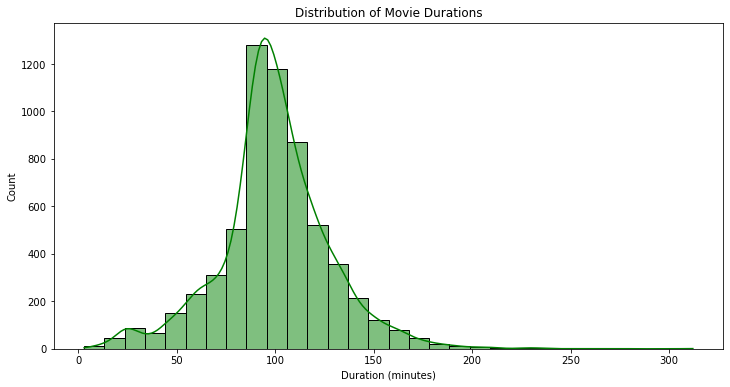

In [28]:
# Distribution of movie durations
plt.figure(figsize=(12, 6))
sns.histplot(x='duration', data=df[df['type'] == 'Movie'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

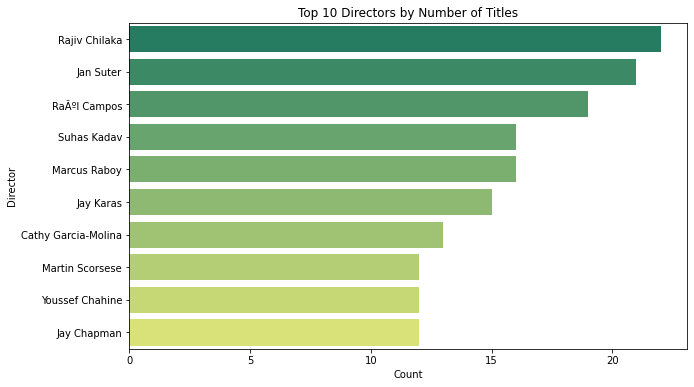

In [40]:
directors = df['director'].str.split(', ')
all_directors = [director for sublist in directors.dropna() for director in sublist]
director_counts = pd.Series(all_directors).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='summer')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()
 


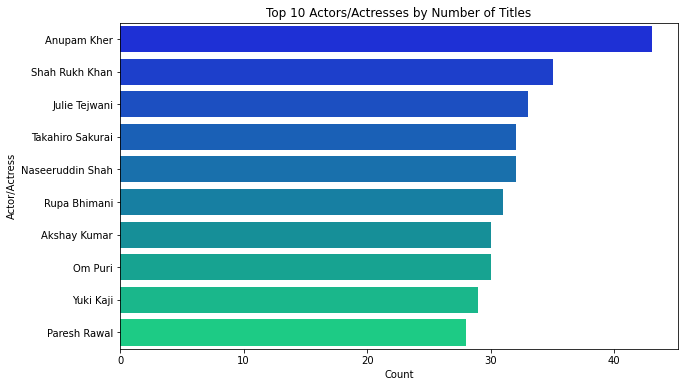

In [41]:
# Distribution of actors/actresses
actors = df['cast'].str.split(', ')
all_actors = [actor for sublist in actors.dropna() for actor in sublist]
actor_counts = pd.Series(all_actors).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='winter')
plt.title('Top 10 Actors/Actresses by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Actor/Actress')
plt.show()

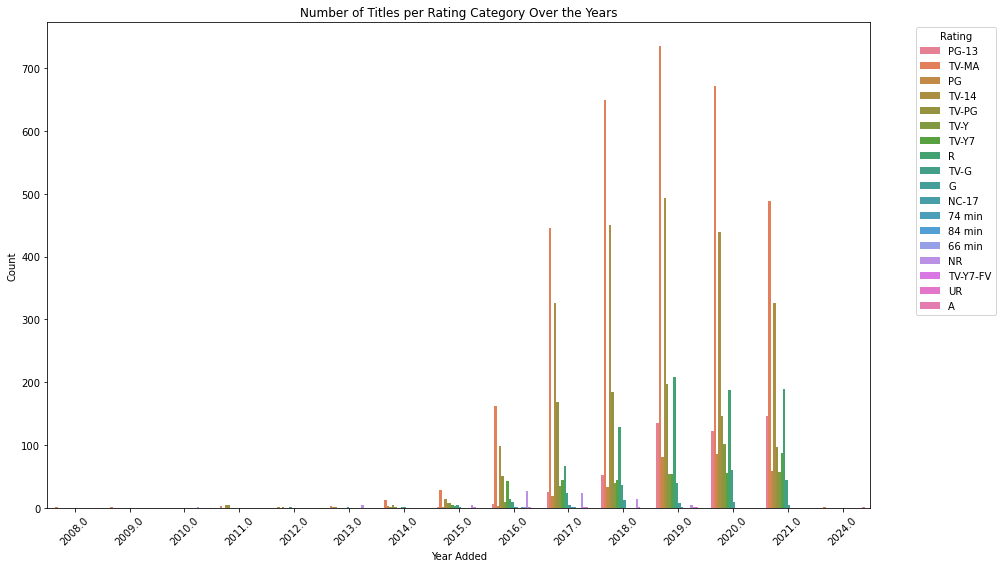

In [47]:
plt.figure(figsize=(14, 8))
sns.countplot(x='year_added', hue='rating', data=df, palette='husl')
plt.title('Number of Titles per Rating Category Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

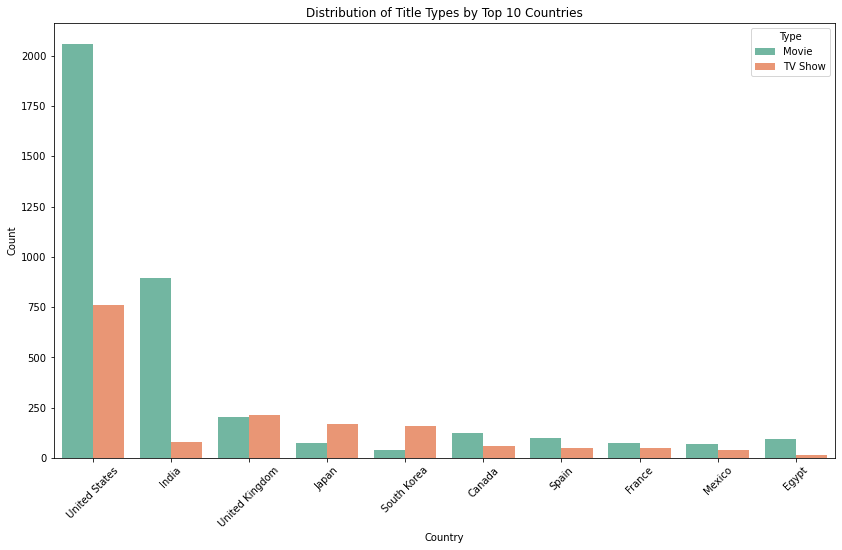

In [45]:
# Distribution of title types by country
plt.figure(figsize=(14, 8))
sns.countplot(x='country', hue='type', data=df, order=df['country'].value_counts().iloc[:10].index, palette='Set2')
plt.title('Distribution of Title Types by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

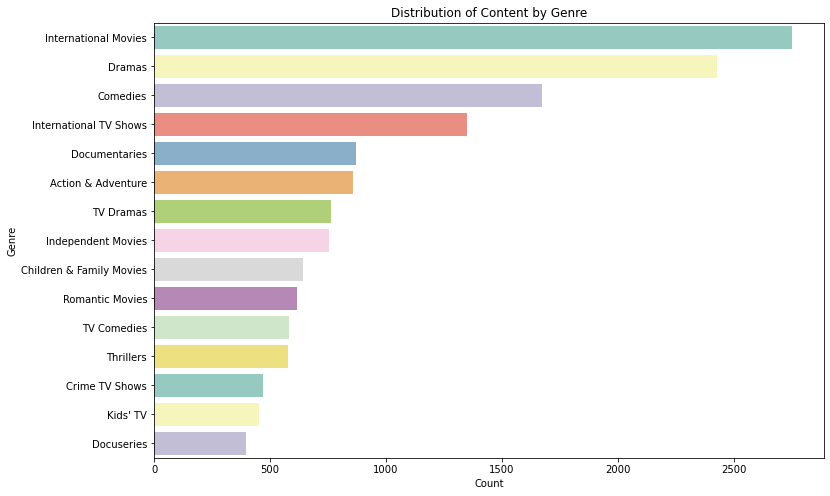

In [48]:
# Distribution of content by genre
plt.figure(figsize=(12, 8))
genres_count = df['listed_in'].str.split(', ').explode().value_counts().head(15)
sns.barplot(x=genres_count.values, y=genres_count.index, palette='Set3')
plt.title('Distribution of Content by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

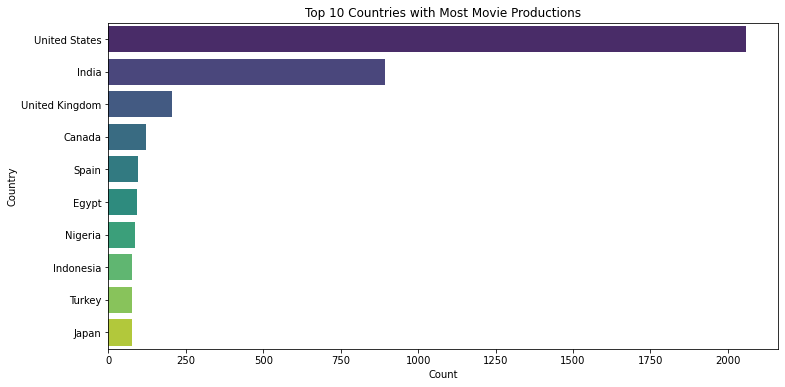

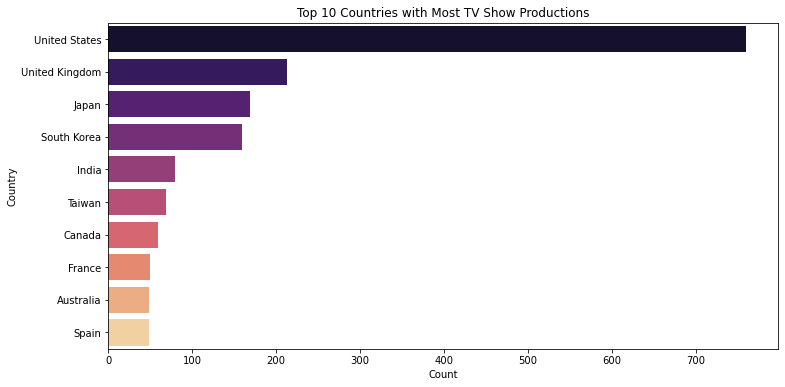

In [49]:
# Top 10 countries with most movie productions
plt.figure(figsize=(12, 6))
top_movie_countries = df[df['type'] == 'Movie']['country'].value_counts().head(10)
sns.barplot(x=top_movie_countries.values, y=top_movie_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Movie Productions')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Top 10 countries with most TV show productions
plt.figure(figsize=(12, 6))
top_tvshow_countries = df[df['type'] == 'TV Show']['country'].value_counts().head(10)
sns.barplot(x=top_tvshow_countries.values, y=top_tvshow_countries.index, palette='magma')
plt.title('Top 10 Countries with Most TV Show Productions')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()